In [18]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [24]:
# Center output plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Kullback-Leibler Divergence (K-L Divergence)

[**Kullback-Leibler divergence**](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) is a measure of how one probability distribution is different from another. It is closely related to [Shannon entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)), hence its another name **relative entropy**.


**K-L divergence** is defined differently for discrete and continuous variables.


* **Discrete** K-L divergence:

$$ \large D_{KL}(P||Q) = \sum_i P(x_i)log(\frac{P(x_i)}{Q(x_i)})$$


* **Continuous** K-L divergence:

$$ \large D_{KL}(P||Q) = \int_{-\infty}^{\infty} P(x)log(\frac{P(x)}{Q(x)})dx$$

## Discrete K-L divergence

In [2]:
# Let's define softmax function to help us get random set of probabilities
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

Let's imagine that we have two dice: 

* a fair one

* a biased one

<img src="https://tht.fangraphs.com/wp-content/uploads/sites/8/2019/06/Dice-Wikimedia-Sankar-1995-2.jpg" alt="Dice" style="width: 400px;"/>

<center><font size = "1">Image source: https://tht.fangraphs.com</font></center>

<br>

The fair dice returns each value with the same probability ($P = 1/6$).

The biased dice returns each value with random probability.

The firt dice will have uniform distribution, while the biased one not.




In [100]:
fair_distr = np.array([1/6] * 6)
bias_distr = softmax(np.random.randn(6))

In [101]:
# Sanity check
sum(bias_distr)

1.0

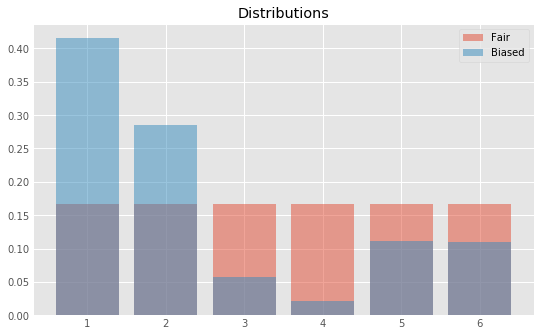

In [102]:
# Let's visualize the distributions
x_vals = np.arange(1, 7)

plt.figure(figsize = (8, 5))
plt.bar(x_vals, fair_distr, alpha = .5, label = 'Fair')
plt.bar(x_vals, bias_distr, alpha = .5, label = 'Biased')
plt.title('Distributions')
plt.legend()
plt.show()

In [120]:
# Let's now compute K-L divergence of these two distributions

def kl_divergence_discrete(p, q, epsilon = 1e-12, bits = True):
    
    p, q = np.array(p) + epsilon, np.array(q) + epsilon
    
    if bits:
        log_func = np.log2
    else:
        log_func = np.log
    
    return np.sum(p * log_func(p / q))

**NOTE:** K-L divergence can be measured in either **bits** or **nats**. To get the result in **bits** use $log_2$. Use natural log otherwise.

In [121]:
kl_divergence_discrete(fair_distr, bias_distr)

0.6051727924914694

### Properties
<br>

Let's note one thing, **K-L divergence** is **not symmetric**:

$$ \large D_{KL}(P||Q) \neq D_{KL}(Q||P)$$

Another useful property is that $D_{KL}$ is always greater or equal to zero:

$$ \large D_{KL}(P||Q), D_{KL}(Q||P) \geq 0$$

### Visualization

Now, let's conduct a small experiment. We'll take our distributions and gradually minimize differences between them to see how it **affects K-L divergence**. 

So, what we're gonna do now is we'll take our **biased** distribution and make it iteratively more similar to our **fair** distribution by wieghting it. At each timestep we'll compare our fair distribution against a weighted mix of fair and biased vectors.

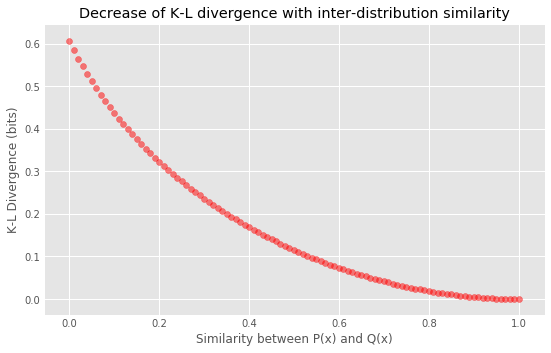

In [122]:
plt.figure(figsize = (8, 5))

for i in np.arange(0, 1.01, .01):
    plt.scatter(i, kl_divergence_discrete(fair_distr, (i * fair_distr + (1 - i) * bias_distr)),
                alpha = .5,
                color = 'red')
    
plt.xlabel('Similarity between P(x) and Q(x)')
plt.ylabel('K-L Divergence (bits)')
plt.title('Decrease of K-L divergence with inter-distribution similarity')
plt.show()